<a href="https://colab.research.google.com/github/linguist7/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/cgan/cgan_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로더

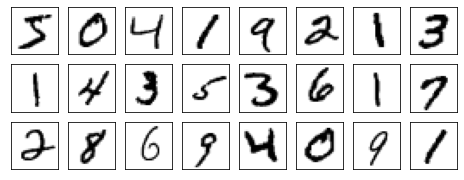

((60000, 28, 28, 1), (60000, 10))

In [1]:
from data_loader import *
from utils import display_sample_img
x_train, y_train, _, _ = mnist_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape

# 모델구성

In [2]:
IMG_SHAPE = (28,28,1)
NOISE_DIM = 128
LABEL_DIM = 10

In [3]:
from model import BuildModel

builder=BuildModel(IMG_SHAPE, NOISE_DIM, LABEL_DIM)
gene = builder.build_gene(last_activation='tanh')
disc= builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 gene_input_noise (InputLayer)  [(None, 128)]        0           []                               
                                                                                                  
 gene_input_condition (InputLay  [(None, 10)]        0           []                               
 er)                                                                                              
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['gene_input_noise[0][0]',       
                                                                  'gene_input_condition[0][0]']   
                                                                                          

# 학습

Model: "CGAN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 Generator (Functional)         (None, 28, 28, 1)    1079041     ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 Discriminator (Functional)     (None, 1)            244865      ['Generator[0][0]',           

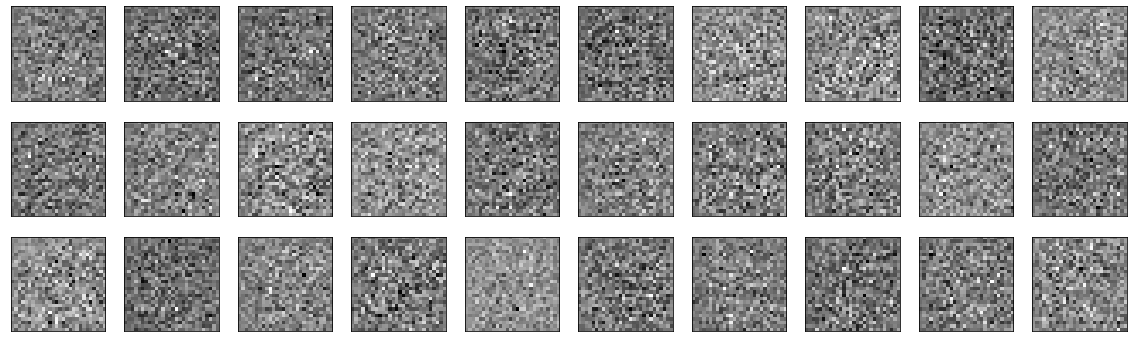

* epoch: 1, d_loss: 653.655130, g_loss: 4939.070849


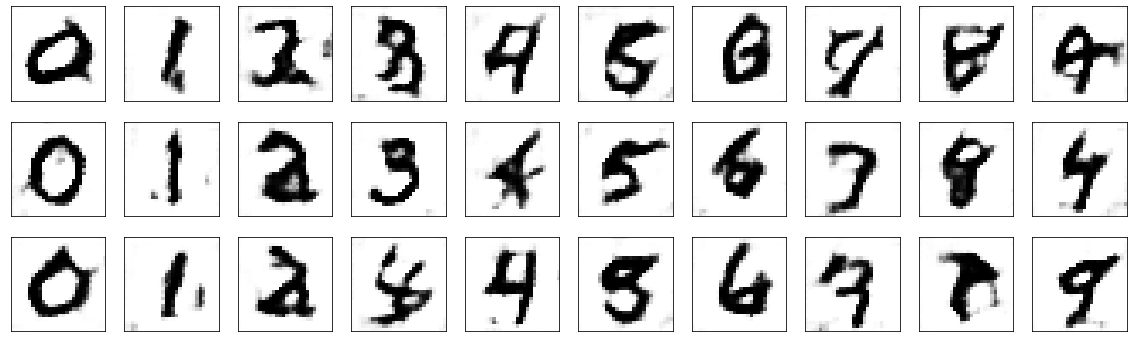

* epoch: 2, d_loss: 823.323536, g_loss: 3535.677512


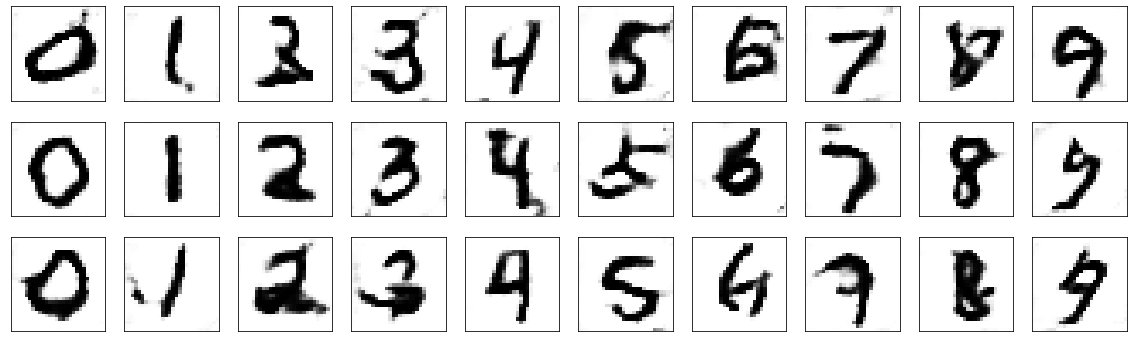

* epoch: 3, d_loss: 795.127245, g_loss: 3586.766608


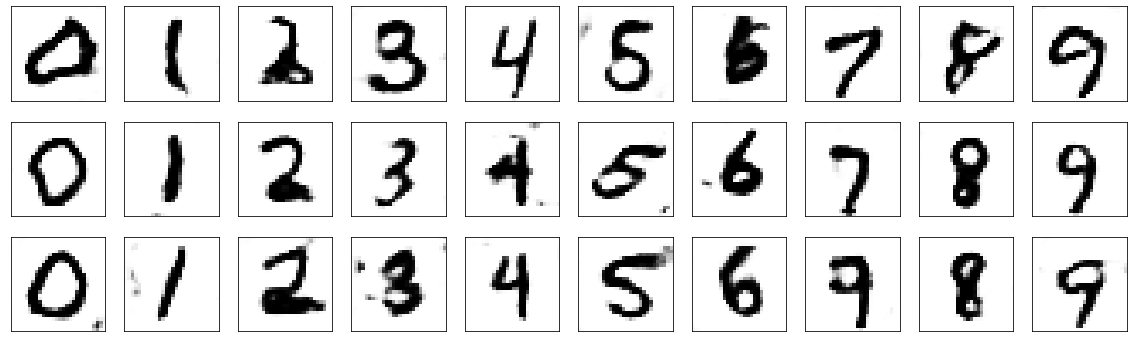

* epoch: 4, d_loss: 764.333189, g_loss: 3772.706863


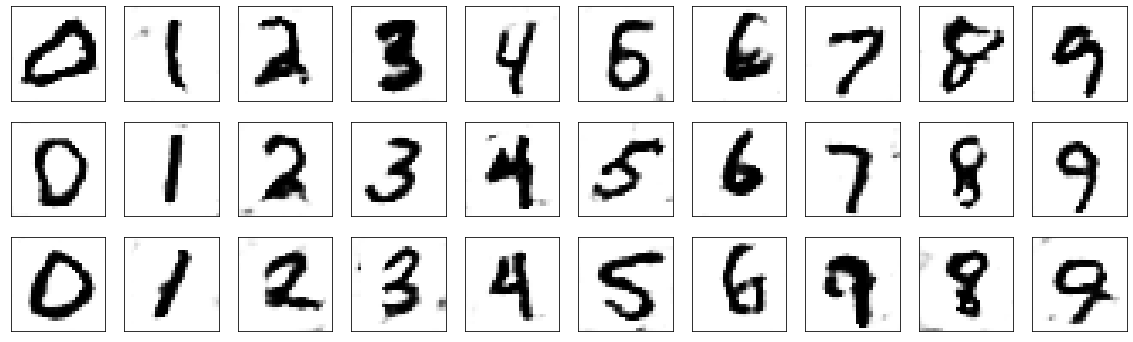

* epoch: 5, d_loss: 741.022524, g_loss: 3861.969602


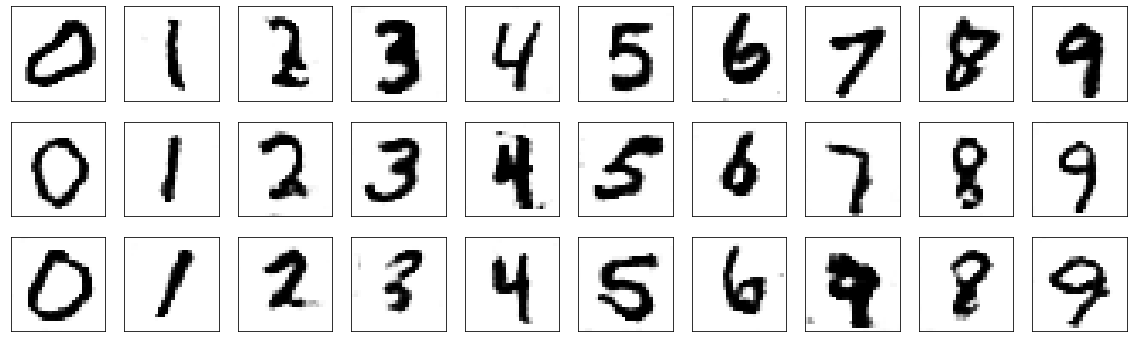

In [4]:
from cgan import CGAN
model = CGAN(gene, disc, IMG_SHAPE, NOISE_DIM, LABEL_DIM)
model.compile()
model.cgan.summary()
model.fit(x_train, y_train, epochs= 5, standard=True)